# 📌 Shopping Trends Data Analysis
Welcome to this notebook where we analyze shopping behavior trends based on a dataset of customer purchases.


In [1]:
pip install pyodbc pandas


Note: you may need to restart the kernel to use updated packages.


## 1. 🧰 Import Libraries
We start by importing all necessary libraries.

In [1]:
import pandas as pd 
import numpy as np 
import pyodbc 

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbrn

## 2. 📥 Load the Dataset 
Let's load the dataset and take an initial look.

In [3]:
server = 'LAPTOP-D9JV24PH\\MSSQLSERVER01'
database = 'ShoppingTrendsDB'

conn_str = (
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"
)

conn = pyodbc.connect(conn_str)
df = pd.read_sql("SELECT * FROM ShoppingTrends", conn)


In [4]:
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


## 3. 🧹 Data Cleaning 
We inspect the data for missing values, duplicates, and incorrect types.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [10]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [66]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [11]:
df.Customer_ID.nunique()

3900

In [18]:
#that means that every customer did only one purchase

In [20]:
df.Gender.value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [21]:
df.Age.describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

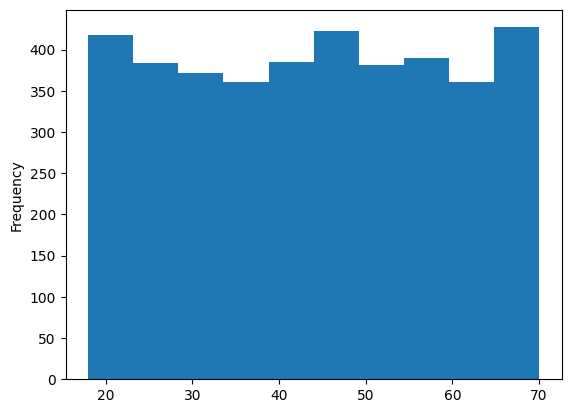

In [22]:
df.Age.plot(kind = "hist")

In [23]:
df.Category.value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [24]:
df.Payment_Method.value_counts()

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

## 4. 📊 Exploratory Data Analysis (EDA)
We explore demographic distributions and trends in purchase behavior.

In [25]:
df.Season.value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [26]:
df.Subscription_Status.value_counts()

Subscription_Status
No     2847
Yes    1053
Name: count, dtype: int64

In [27]:
df.Shipping_Type.value_counts()

Shipping_Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

In [28]:
df.Location.value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

In [33]:
df.Purchase_Amount_USD.describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase_Amount_USD, dtype: float64

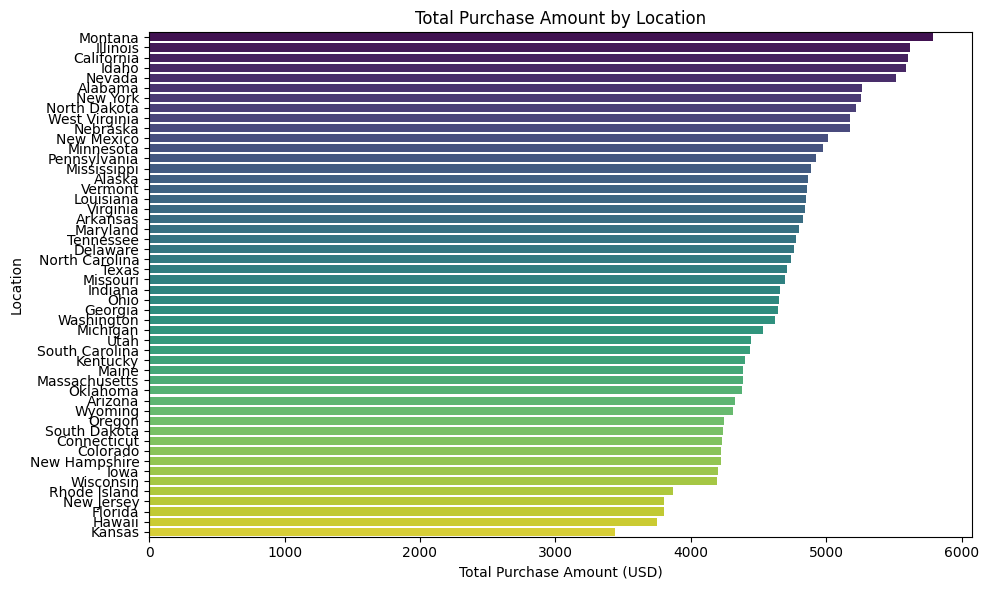

In [31]:
# Step 1: Group and sort
location_spending = df.groupby('Location')['Purchase_Amount_USD'].sum().sort_values(ascending=False)

# Step 2: Plot
plt.figure(figsize=(10, 6))
sbrn.barplot(x=location_spending.values, y=location_spending.index, palette='viridis')

plt.title('Total Purchase Amount by Location')
plt.xlabel('Total Purchase Amount (USD)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


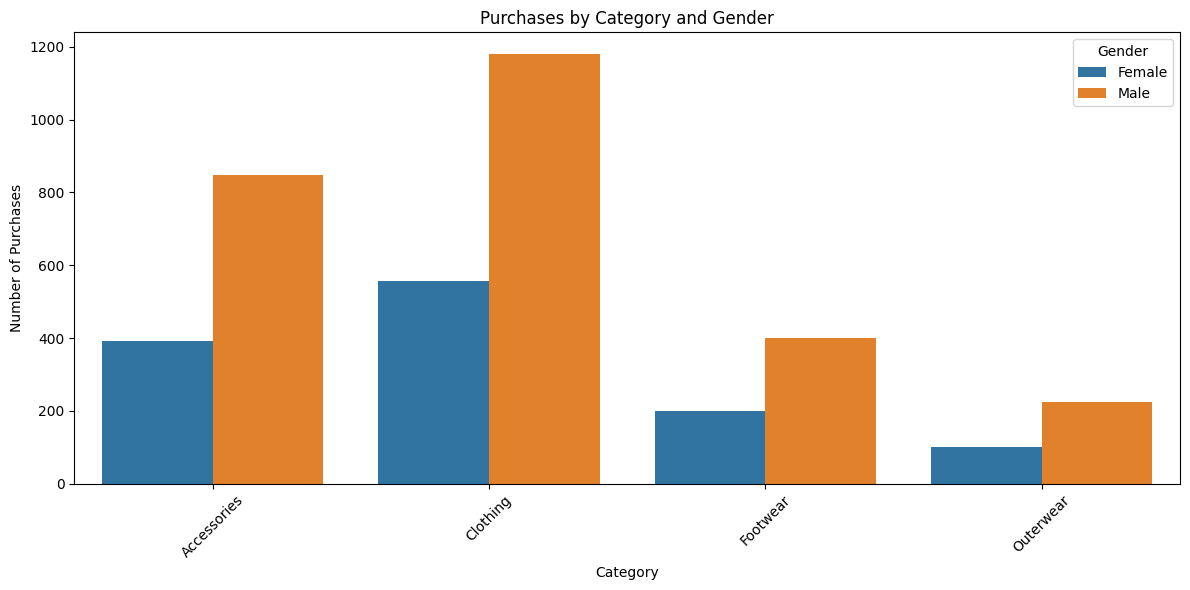

In [35]:
# Step 1: Get counts per Category-Gender pair
category_gender_counts = df.groupby(['Category', 'Gender']).size().reset_index(name='Count')

# Step 2: Plot
plt.figure(figsize=(12, 6))
sbrn.barplot(data=category_gender_counts, x='Category', y='Count', hue='Gender')

plt.title('Purchases by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
df.Size.value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

In [37]:
df.Color.value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

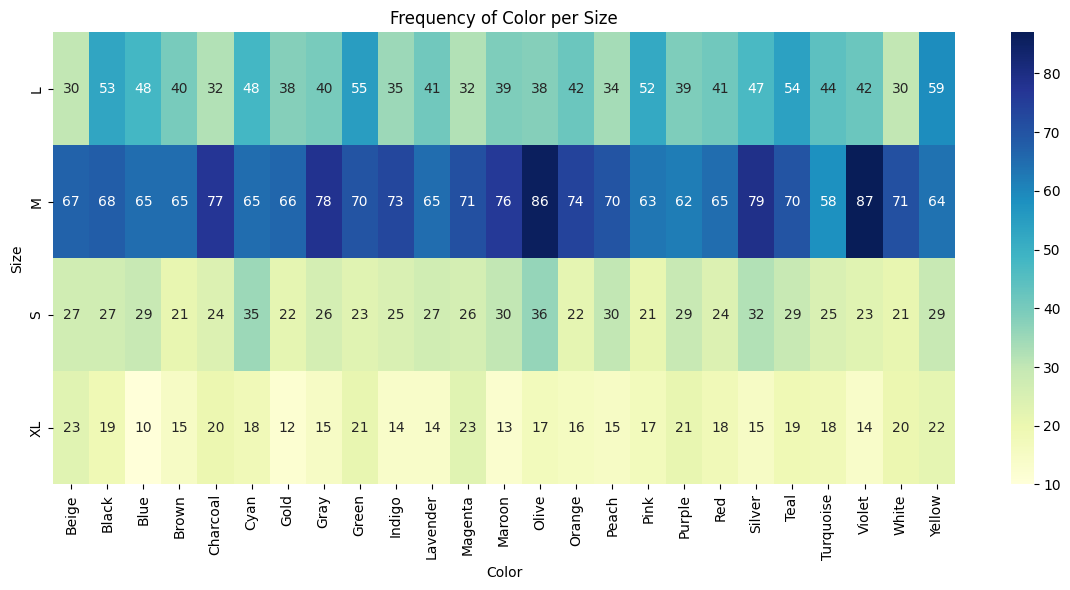

In [39]:
# Step 1: Create a frequency table
size_color_matrix = pd.crosstab(df['Size'], df['Color'])

# Step 2: Plot heatmap
plt.figure(figsize=(12, 6))
sbrn.heatmap(size_color_matrix, cmap='YlGnBu', annot=True, fmt='d')

plt.title('Frequency of Color per Size')
plt.xlabel('Color')
plt.ylabel('Size')
plt.tight_layout()
plt.show()

In [ ]:
#For larger sizes (30–59): Violet appears most frequently (frequency = 87 at size 42).
#For smaller sizes (21–36): Black (size 27) and Magenta (size 26) tie for the highest frequency (23).

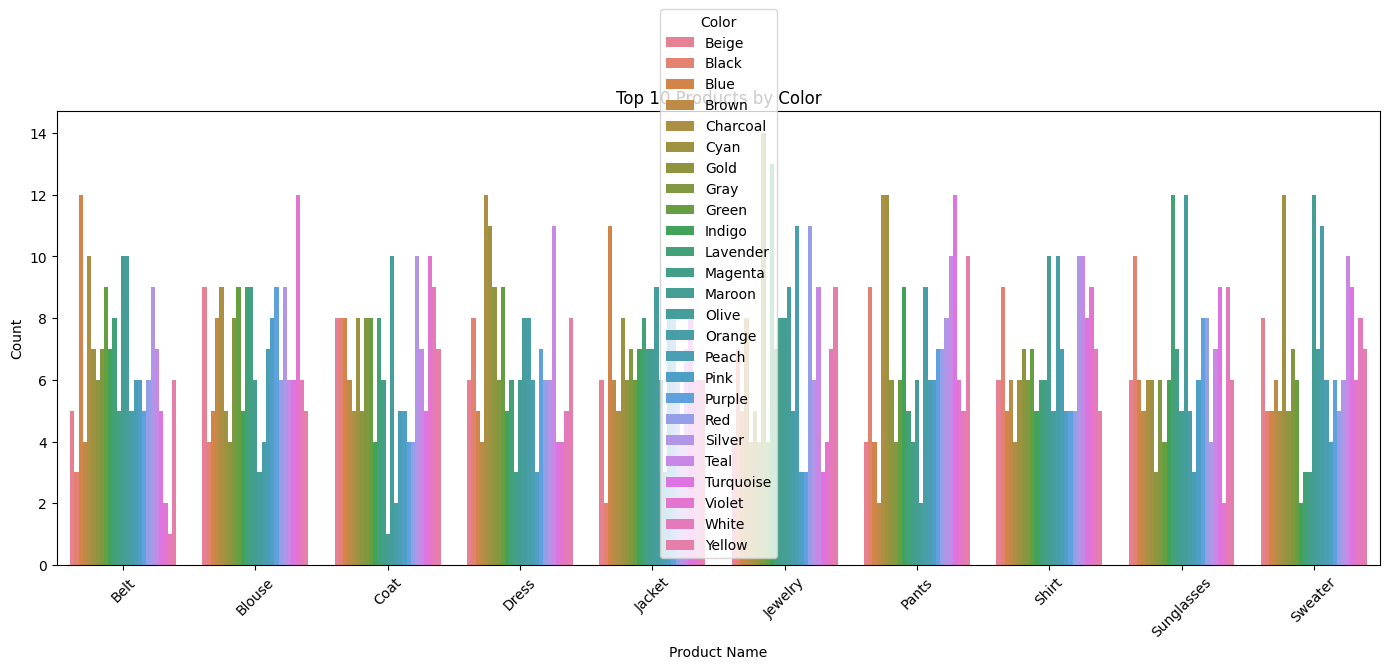

In [48]:
# Step 1: Count combinations
color_item_df = (
    df.groupby(['Item_Purchased', 'Color'])
    .size()
    .reset_index(name='Count')
)

# Step 2: Filter top 10 items
top_products = (
    color_item_df.groupby('Item_Purchased')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
filtered_df = color_item_df[color_item_df['Item_Purchased'].isin(top_products)]

# Step 3: Plot
plt.figure(figsize=(14, 6))
sbrn.barplot(data=filtered_df, x='Item_Purchased', y='Count', hue='Color', dodge=True)

plt.title('Top 10 Products by Color')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Color')
plt.tight_layout()  
plt.show()


In [6]:
# Trying to see if there are any benifits for people who are Supscriped the People who Didn't Supscripe does'nt have.
df_subscribed = df[df['Subscription_Status'] == 'Yes'].copy()
df_unsubscribed = df[df['Subscription_Status'] == 'No'].copy()

In [9]:
df_subscribed.Subscription_Status.value_counts()

Subscription_Status
Yes    1053
Name: count, dtype: int64

In [13]:
df_subscribed.Discount_Applied.value_counts()

Discount_Applied
Yes    1053
Name: count, dtype: int64

In [ ]:
#if customer's Subscription_Statues is "Yes" , he can has a Discount on his Purshaces  

## 5. 📈 Visualizations
We use charts to understand category-wise and country-wise spending patterns.

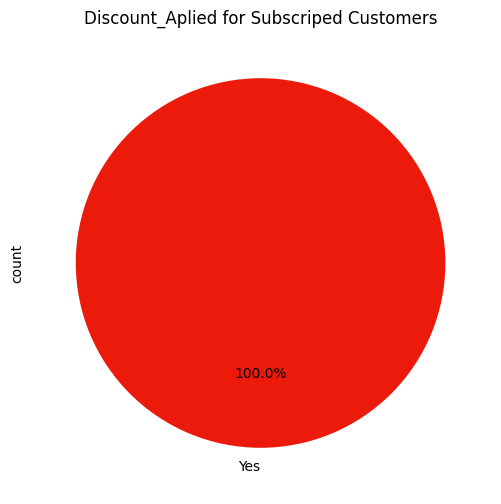

In [37]:
df_subscribed['Discount_Applied'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=['#EB1A0A','#2CBF0E'])
plt.title('Discount_Aplied for Subscriped Customers')
plt.show()

In [7]:
df_subscribed.Review_Rating.describe()

count    1053.000000
mean        3.742450
std         0.717974
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review_Rating, dtype: float64

In [11]:
df_subscribed.Payment_Method.value_counts()

Payment_Method
Credit Card      194
Debit Card       180
Cash             179
Venmo            174
Bank Transfer    167
PayPal           159
Name: count, dtype: int64

In [10]:
df_unsubscribed.Subscription_Status.value_counts()

Subscription_Status
No    2847
Name: count, dtype: int64

In [8]:
df_unsubscribed.Review_Rating.describe()

count    2847.000000
mean        3.752722
std         0.715680
min         2.500000
25%         3.100000
50%         3.800000
75%         4.400000
max         5.000000
Name: Review_Rating, dtype: float64

In [12]:
df_unsubscribed.Payment_Method.value_counts()

Payment_Method
Credit Card      502
PayPal           479
Venmo            479
Cash             469
Bank Transfer    465
Debit Card       453
Name: count, dtype: int64

In [14]:
df_unsubscribed.Discount_Applied.value_counts()

Discount_Applied
No     2223
Yes     624
Name: count, dtype: int64

In [15]:
df_unsubscribed.Discount_Applied.value_counts(normalize= True)

Discount_Applied
No     0.780822
Yes    0.219178
Name: proportion, dtype: float64

In [ ]:
#if customer's Subscription_Statues is "No" , his Chances to has a Discount will be 21.9% on his Purshaces

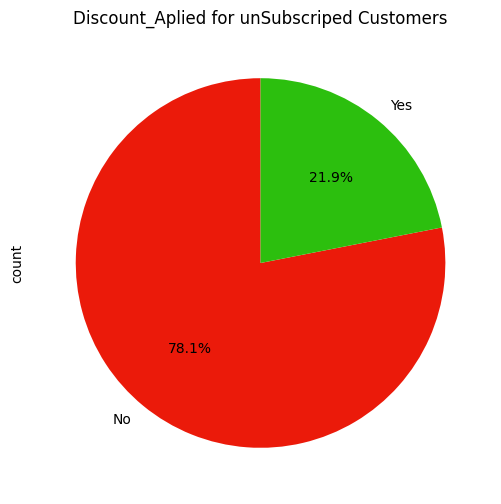

In [36]:
df_unsubscribed['Discount_Applied'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=['#EB1A0A','#2CBF0E'])
plt.title('Discount_Aplied for unSubscriped Customers')
plt.show()

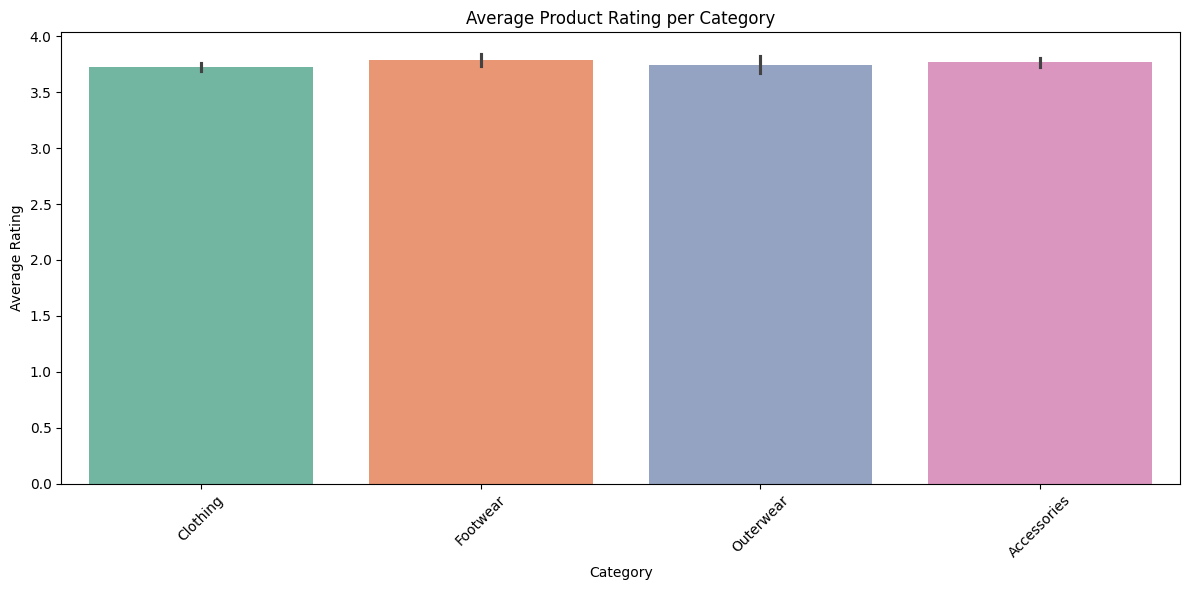

In [25]:
plt.figure(figsize=(12, 6))
sbrn.barplot(data=df, x='Category', y='Review_Rating', estimator='mean', palette='Set2')

plt.title('Average Product Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


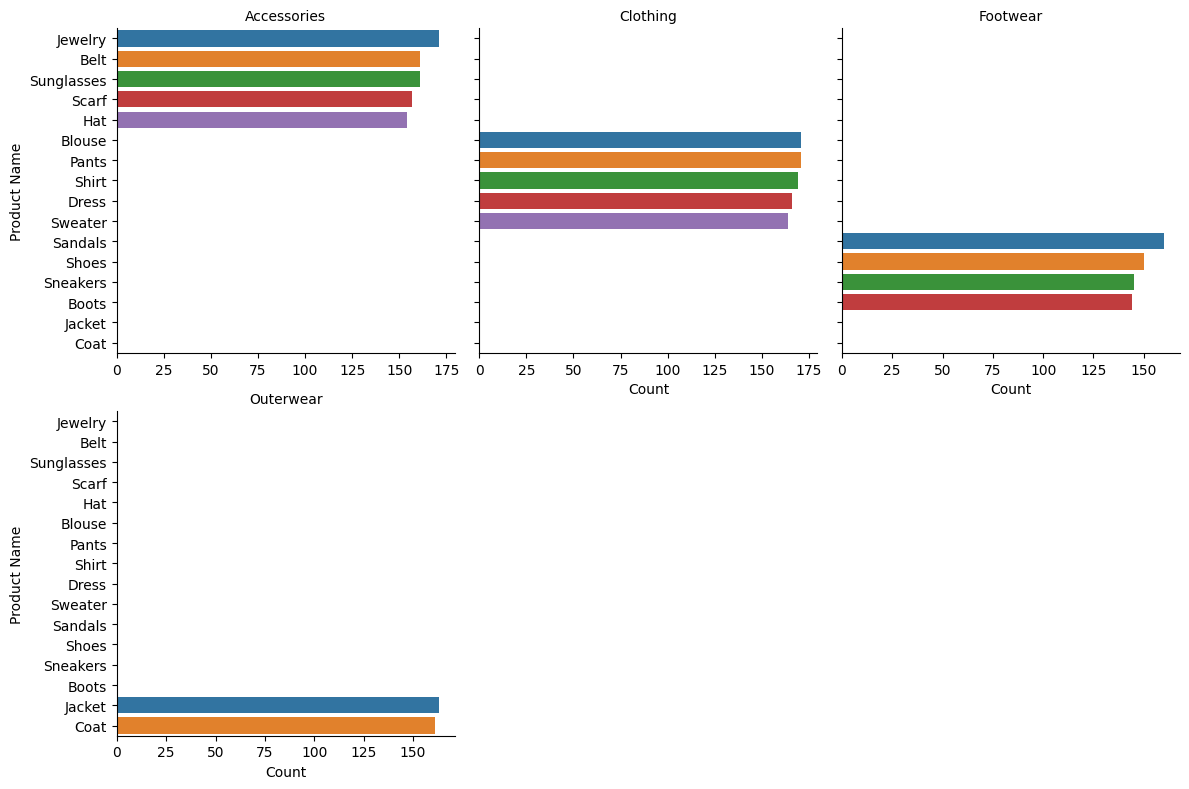

In [30]:
top_items = (
    df.groupby(['Category', 'Item_Purchased'])
    .size()
    .reset_index(name='Count')
)

top_items_per_cat = (
    top_items
    .sort_values(['Category', 'Count'], ascending=[True, False])
    .groupby('Category')
    .head(5)
)

g = sbrn.FacetGrid(top_items_per_cat, col='Category', col_wrap=3, height=4, sharex=False)
g.map_dataframe(sbrn.barplot, x='Count', y='Item_Purchased', palette='tab10')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Count", "Product Name")
plt.tight_layout()
plt.show()

In [49]:
df.Frequency_of_Purchases.describe()

count               3900
unique                 7
top       Every 3 Months
freq                 584
Name: Frequency_of_Purchases, dtype: object

In [50]:
df.Frequency_of_Purchases.value_counts()

Frequency_of_Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

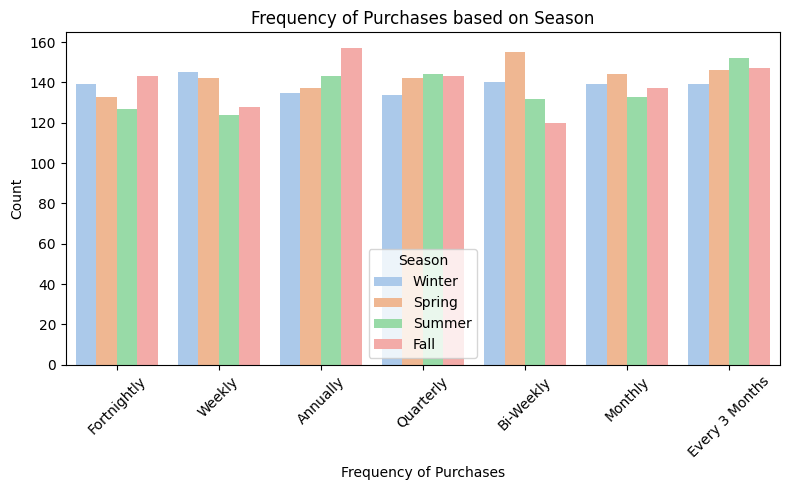

In [67]:
plt.figure(figsize=(8,5))
sbrn.countplot(x='Frequency_of_Purchases', hue='Season', data=df, palette='pastel')
plt.title('Frequency of Purchases based on Season')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
#People who purchase "annualy" usually purchase in the "Fall" , and People who purchase "Bi-Weekly" usually purchase in the "Spring"

## 6. Saving Dataset to Excel 
We make it into excel to make the DB.

In [72]:
df.drop(columns=['Customer_ID'], inplace=True)

In [75]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [7]:
df.to_excel('Shopping_Trends.xlsx', index = False)